In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import helper functions from the functions.py file
import functions as f

TTN_BIN = 4277
TTN_BINS = [4275, 4276, 4277, 4278]
chrom2_bins = [2490, 4911]

In [4]:
contact_matrix = np.load('/Users/ethan/Desktop/chromatin-heart-dev/samples/contact_matrix_100kb_balanced.npy')
contact_matrix_zero = np.load('/Users/ethan/Desktop/chromatin-heart-dev/samples/contact_matrix_100kb_balanced_zeroed.npy')

In [5]:
# LOAD BIN MAP
bin_map = f.load_bin_map('/Users/ethan/Desktop/chromatin-heart-dev/data/bin_map_human_100000.bed')

In [105]:
gene_bins = []
with open('/Users/ethan/Desktop/chromatin-heart-dev/data/gene_bins.txt', 'r') as file:
    for line in file:
        gene_bins.append(line.strip())
gene_bins = [int(x) for x in gene_bins]


non_gene_bins = []
with open('/Users/ethan/Desktop/chromatin-heart-dev/data/non_gene_bins.txt', 'r') as file:
    for line in file:
        non_gene_bins.append(line.strip())
non_gene_bins = [int(x) for x in non_gene_bins]

## Finding TTN Clique Greedy

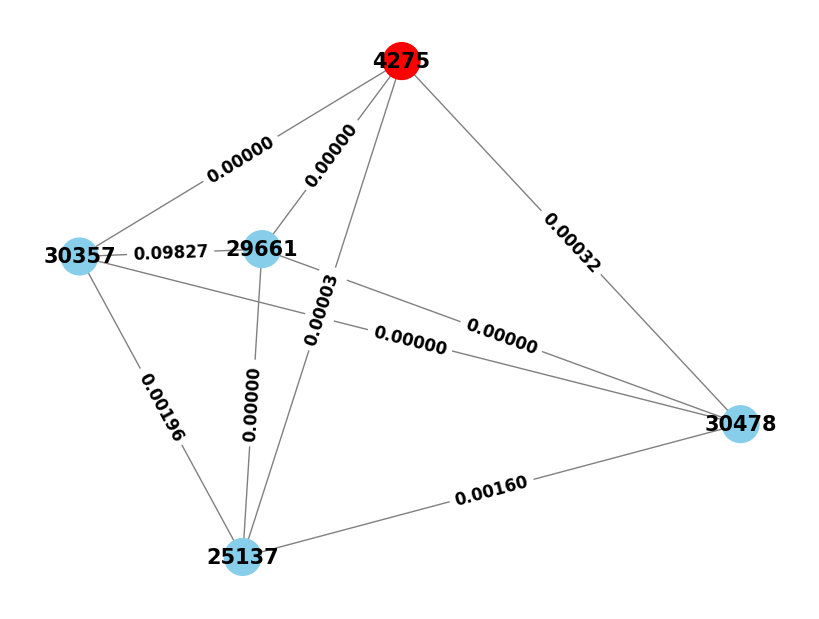

In [15]:
TTN_BIN = 4275
ttn_clique = f.find_clique_greedy(contact_matrix, 5, TTN_BIN, bin_map)
G_TTN = f.clique_to_graph(contact_matrix, ttn_clique, TTN_BIN)
score_greedy = f.calculate_avg_interaction_strength(contact_matrix, ttn_clique)

In [465]:
ttn_clique, score_greedy

([4275, 30478, 25137, 30357, 29661], np.float64(0.010217975885194035))

## Background Model Generation

Processing: 100%|██████████| 1000/1000 [04:05<00:00,  4.08iteration/s]


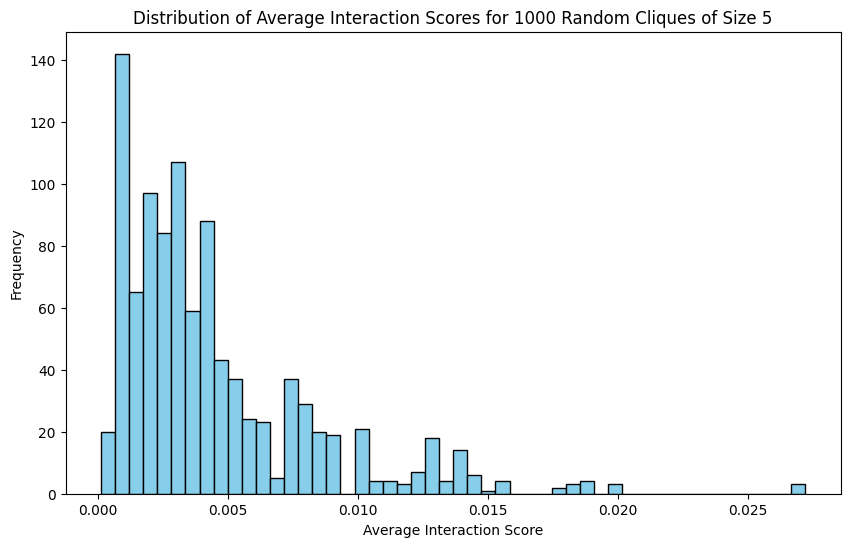

In [486]:
bg_greedy_5 = f.create_background_model_greedy(contact_matrix, 5, bin_map, 1000)

In [ ]:
f.simple_p_test(score_greedy, bg_greedy_5)

np.float64(0.087)

Processing: 100%|██████████| 100/100 [00:58<00:00,  1.71iteration/s]


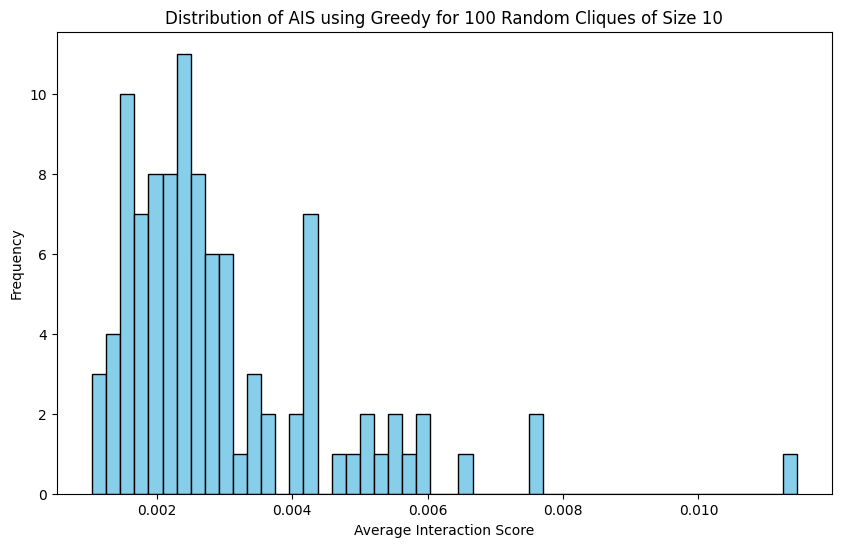

In [501]:
bg_greedy_10 = f.create_background_model_greedy(contact_matrix, 10, bin_map, 100)

In [504]:
greedy_score_10 = f.calculate_avg_interaction_strength(contact_matrix, f.find_clique_greedy(contact_matrix, 10, TTN_BIN, bin_map))
print(greedy_score_10)
print(f.simple_p_test(greedy_score_10, bg_greedy_10))

0.003796834802173981
0.23


Processing: 100%|██████████| 100/100 [02:13<00:00,  1.34s/iteration]


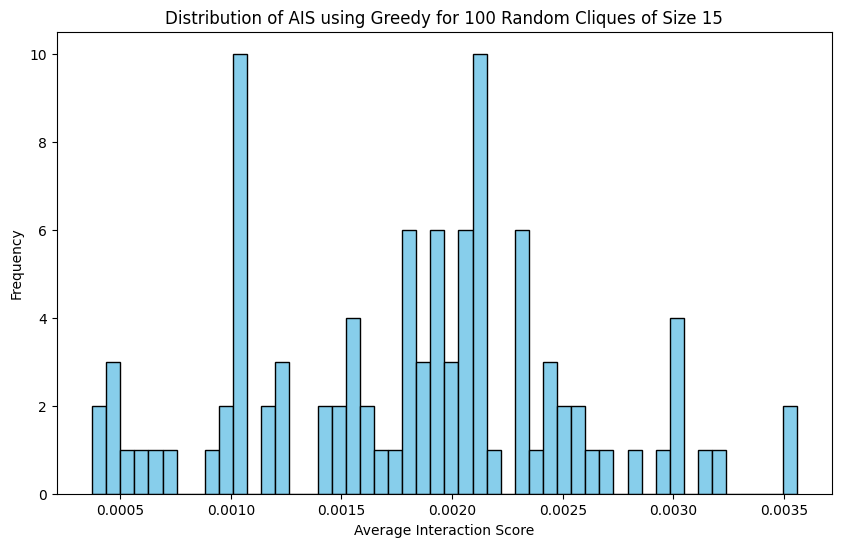

In [506]:
bg_greedy_15 = f.create_background_model_greedy(contact_matrix, 15, bin_map, 100)

In [509]:
greedy_score_15 = f.calculate_avg_interaction_strength(contact_matrix, f.find_clique_greedy(contact_matrix, 15, TTN_BIN, bin_map))
print(greedy_score_15)
print(f.simple_p_test(greedy_score_15, bg_greedy_15))

0.0023150855197524175
0.22


## Sample Matrix

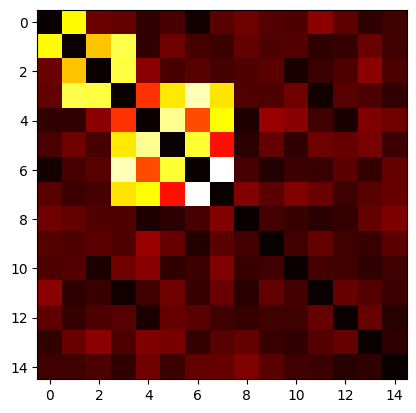

In [3]:
# create a sample matrix
sample_matrix = f.generate_sample_matrix_bins(15)

# visualize the contact matrix hic 
plt.imshow(contact_matrix, cmap='hot', interpolation='nearest')
plt.show()


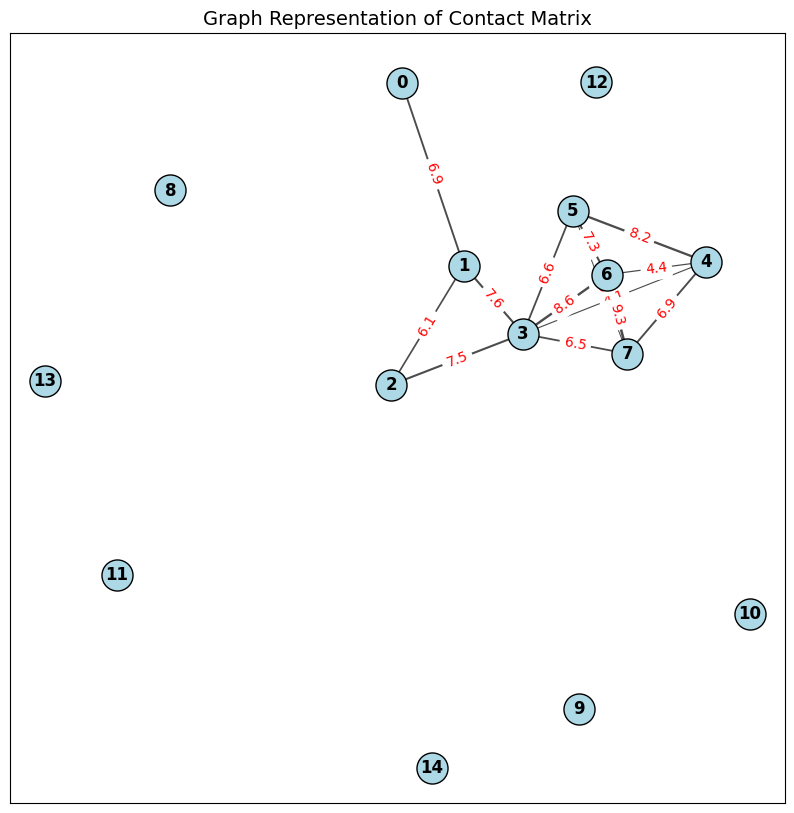

In [ ]:


# zero out cm if not above 2
sample_matrix = np.where(contact_matrix < 2, 0, sample_matrix)

# plot this on a graph
G = f.construct_graph_from_contact_matrix(sample_matrix, threshold=0)



## Random Walk Clique Size 5

In [399]:
top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=1000, alpha=0.05, verbose=True) 
rw_score_5  = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)
rw_score_5  


100%|██████████| 1000/1000 [00:03<00:00, 290.04it/s]


np.float64(0.0003882285340160518)

Processing: 100%|██████████| 100/100 [04:52<00:00,  2.92s/iteration]


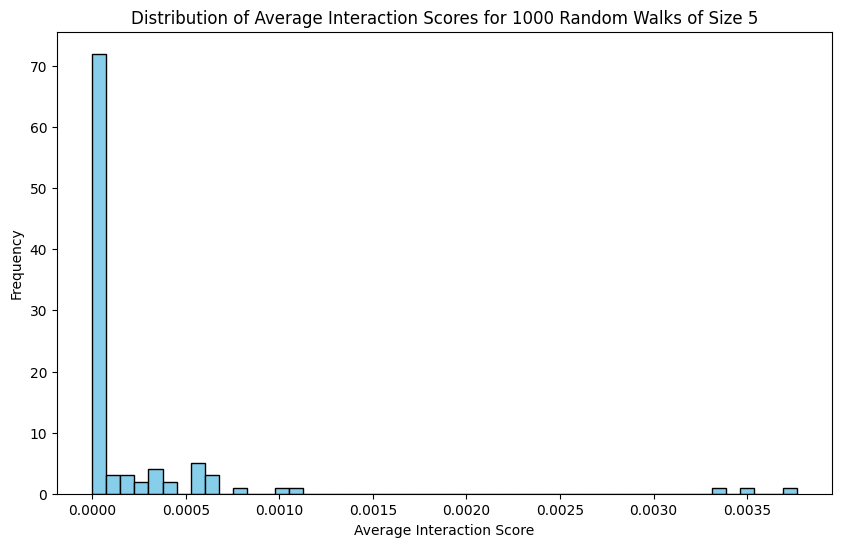

In [393]:
bg_model_random_walk_5 = f.create_background_model_rw(contact_matrix_zero, 5, num_molecules=1000, num_iterations=100, alpha=0.05)

In [402]:
f.simple_p_test(rw_score_5, bg_model_random_walk_5)

np.float64(0.16)

In [400]:
rw_score_5

np.float64(0.0003882285340160518)

## Random Walk Clique Size 5 with 100 molecules

Processing: 100%|██████████| 1000/1000 [04:50<00:00,  3.44iteration/s]


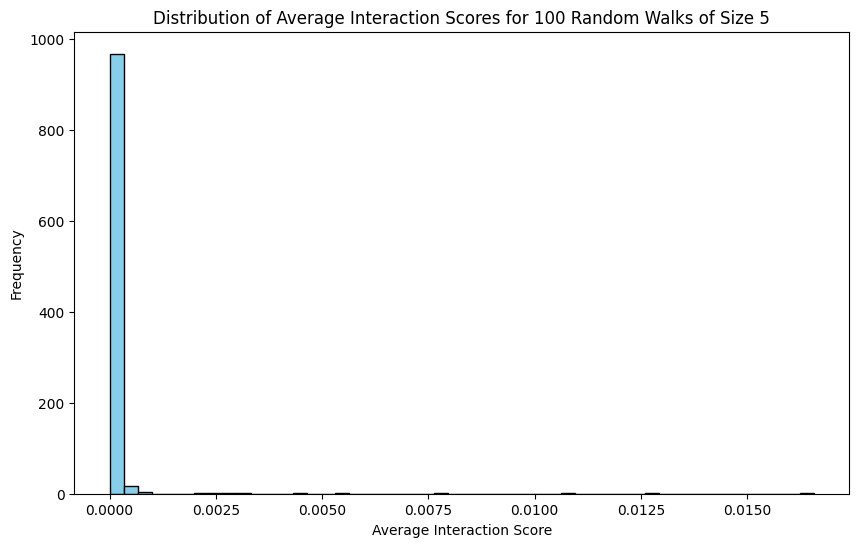

In [409]:
bg_model_random_walk_sample = f.create_background_model_rw(contact_matrix_zero, 5, num_molecules=100, num_iterations=1000, alpha=0.05)

In [418]:
top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=100, alpha=0.05, verbose=True) 
rw_score_5  = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)
rw_score_5  


100%|██████████| 100/100 [00:00<00:00, 297.81it/s]


np.float64(0.0003770925531242224)

In [420]:
f.simple_p_test(rw_score_5, bg_model_random_walk_sample)

np.float64(0.031)

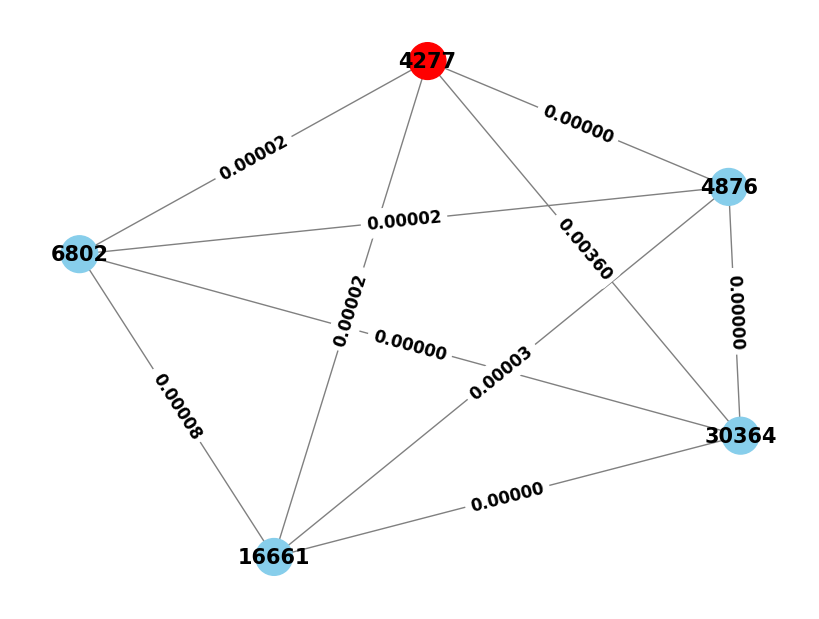

In [430]:
nodes = [ 4277, 30364, 16661,  6802,  4876]
f.clique_to_graph(contact_matrix_zero, nodes, TTN_BIN)   


## Random Walk Clique Size 10

In [ ]:
top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 10, num_molecules=1000, alpha=0.05, verbose=True) 
rw_score_10  = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)

100%|██████████| 1000/1000 [00:03<00:00, 286.90it/s]


Processing: 100%|██████████| 100/100 [04:38<00:00,  2.79s/iteration]


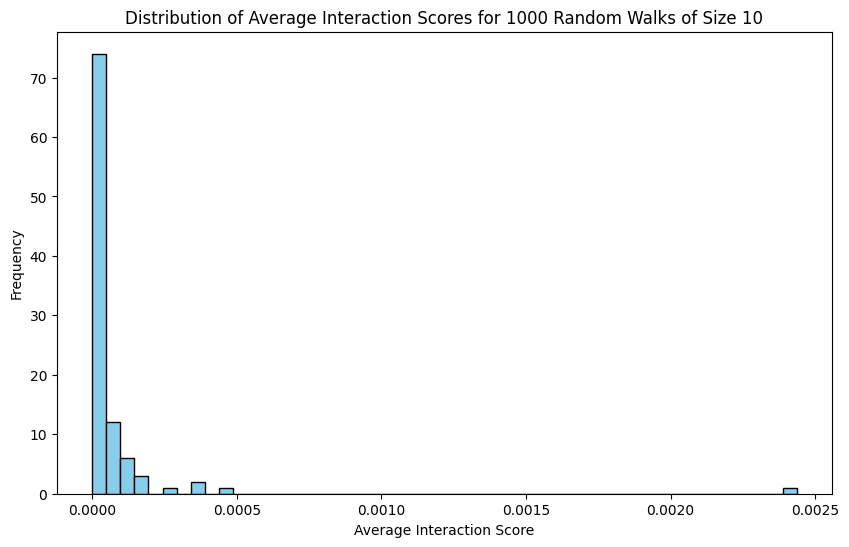

In [388]:
bg_model_random_walk_10 = f.create_background_model_rw(contact_matrix_zero, 10, num_molecules=1000, num_iterations=100, alpha=0.05)
# save list of scores in /background_models

with open('/Users/ethan/Desktop/chromatin-heart-dev/background_models/rw_scores_10.txt', 'w') as f:
    for item in bg_model_random_walk_10:
        f.write("%s\n" % item)

In [557]:
f.simple_p_test(rw_score_10, bg_model_random_walk_10)

np.float64(0.31)

In [392]:
rw_score_10

np.float64(4.0472059410651015e-05)

## RW Clique Size 15

Processing: 100%|██████████| 1000/1000 [50:01<00:00,  3.00s/iteration]


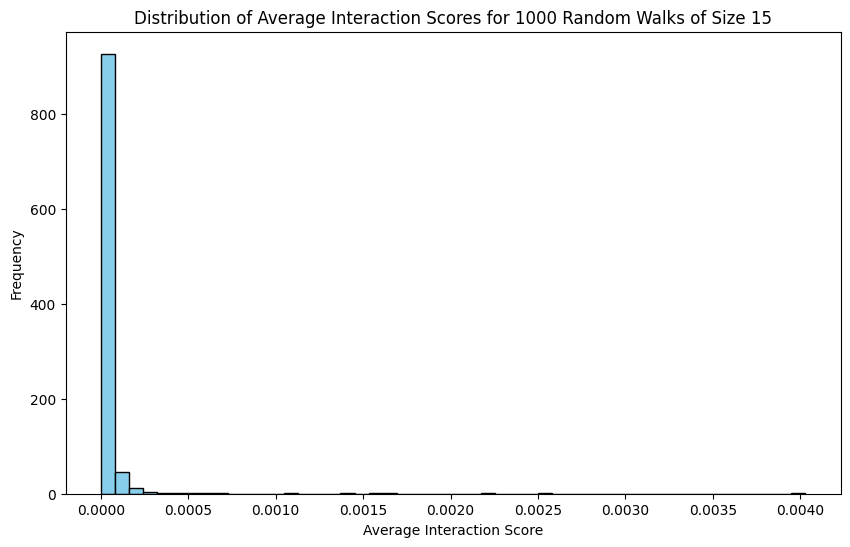

In [490]:
bg_model_random_walk_15 = f.create_background_model_rw(contact_matrix_zero, 15, num_molecules=1000, num_iterations=1000, alpha=0.05)

In [496]:
top_nodes_rw_15 = f.random_walk(contact_matrix_zero, TTN_BIN, 15, num_molecules=1000, alpha=0.05, verbose=True) 
rw_score_15  = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)
print(top_nodes_rw_15)
print(rw_score_15)

100%|██████████| 1000/1000 [00:03<00:00, 297.18it/s]

[ 4275 27734 24275 24937 20669 16879 11312 25597 27958 11448 17531 26857
 21873 28048 20209]
0.0003770925531242224


In [497]:
import functions as f
f.simple_p_test(rw_score_15, bg_model_random_walk_15)

np.float64(0.013)

## Plot of Clique Size to P Value

In [66]:
from scipy import stats

def t_test(observed_score, score_list):
    t_stat, p_value = stats.ttest_1samp(score_list, observed_score)
    return p_value


def mann_whitney_u_test(ttn_score, random_scores):
    ttn_array = np.array([ttn_score] * len(random_scores)) 
    u_statistic, p_value = stats.mannwhitneyu(ttn_array, random_scores, alternative='greater')
    return p_value

def empirical_p_value(observed_score, random_scores):
    count = sum(score >= observed_score for score in random_scores)
    p_value = count / len(random_scores)
    return p_value

    """
    Compares an observed score to a list of scores using a permutation test.
    """
    combined_scores = np.concatenate([score_list, [observed_score]])
    n_observed = 1
    n_other = len(score_list)

    observed_statistic = observed_score # Or another relevant statistic

    extreme_count = 0
    for _ in range(n_permutations):
        permuted_indices = np.random.permutation(len(combined_scores))
        permuted_observed_score = combined_scores[permuted_indices[-1]] # Assume observed score is the last one

        permuted_statistic = permuted_observed_score # Use the same statistic

        # Adjust the comparison based on the direction of significance you're looking for
        # For "more significant" (assuming higher score), check if permuted statistic is as extreme or more extreme
        if permuted_statistic >= observed_statistic:
            extreme_count += 1

    p_value = extreme_count / n_permutations
    return p_value


In [539]:
TTN_BIN

4275

Processing: 100%|██████████| 1000/1000 [01:49<00:00,  9.17iteration/s]


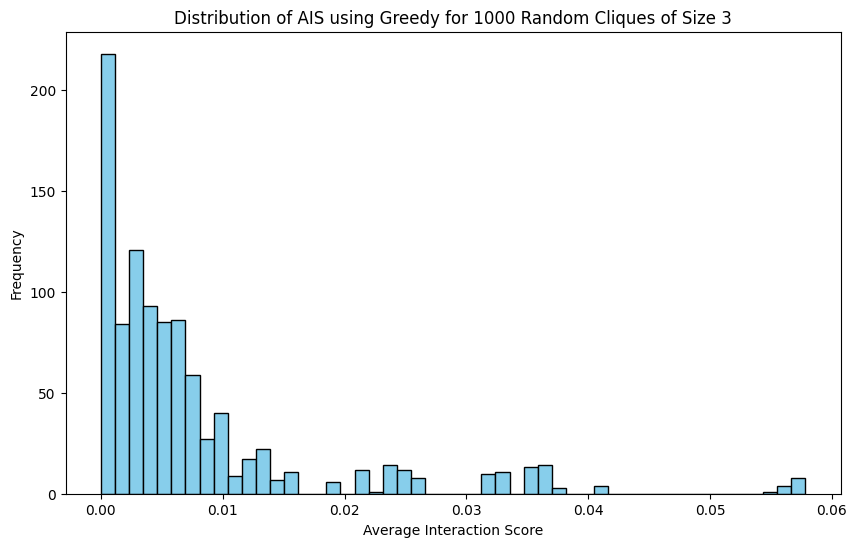

Processing: 100%|██████████| 1000/1000 [02:54<00:00,  5.74iteration/s]


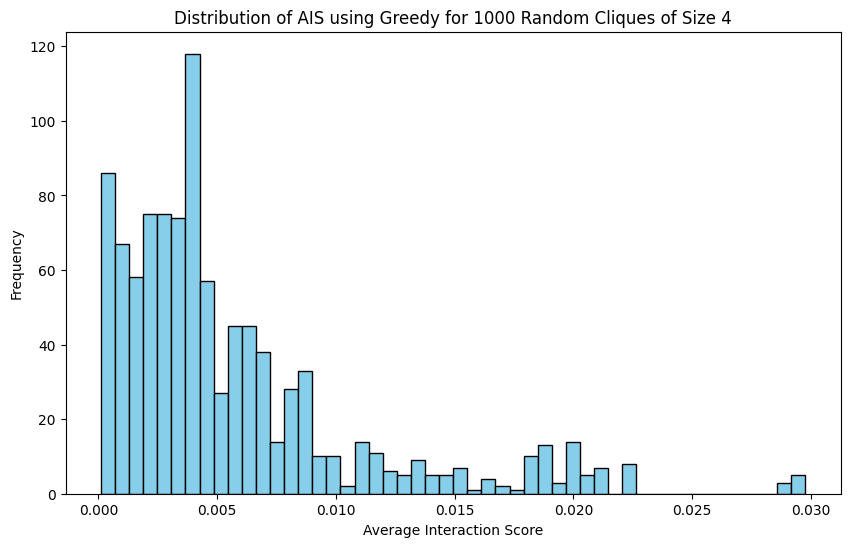

Processing: 100%|██████████| 1000/1000 [04:41<00:00,  3.56iteration/s]


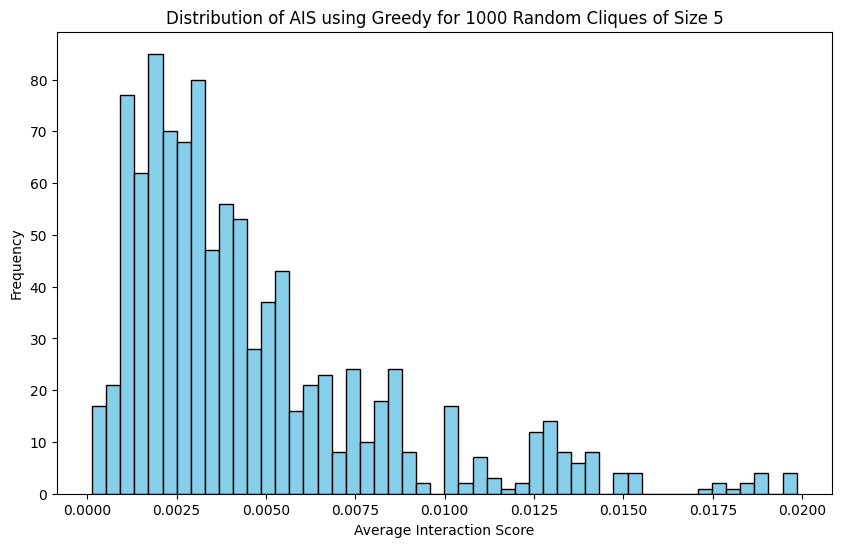

Processing: 100%|██████████| 1000/1000 [09:11<00:00,  1.81iteration/s]


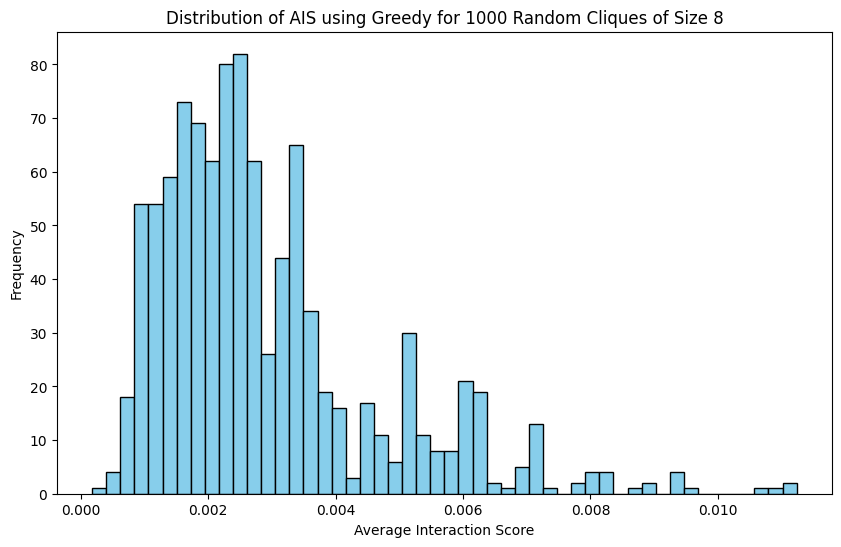

Processing: 100%|██████████| 1000/1000 [13:28<00:00,  1.24iteration/s]


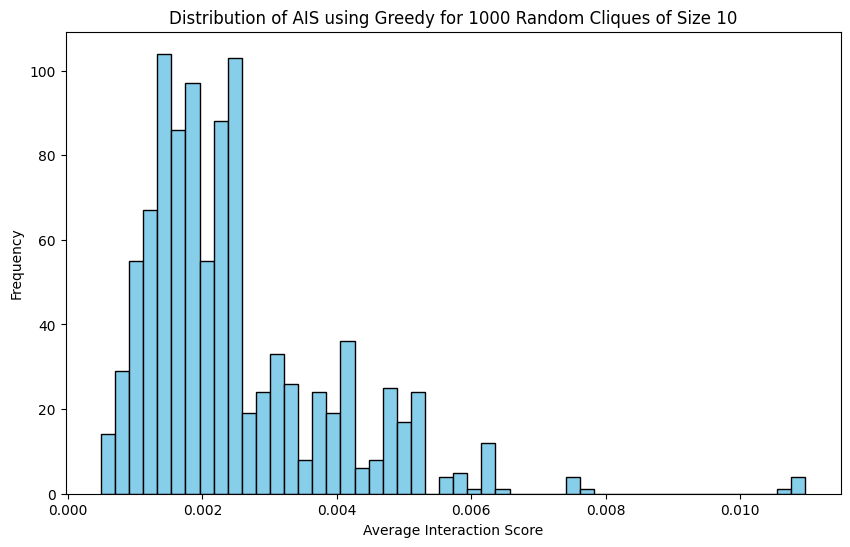

Processing: 100%|██████████| 1000/1000 [20:59<00:00,  1.26s/iteration]


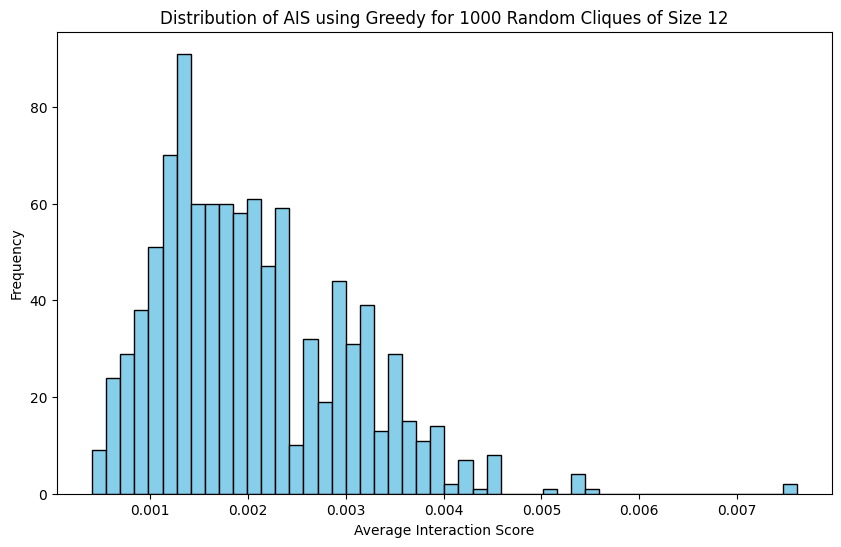

Processing: 100%|██████████| 1000/1000 [24:56<00:00,  1.50s/iteration]


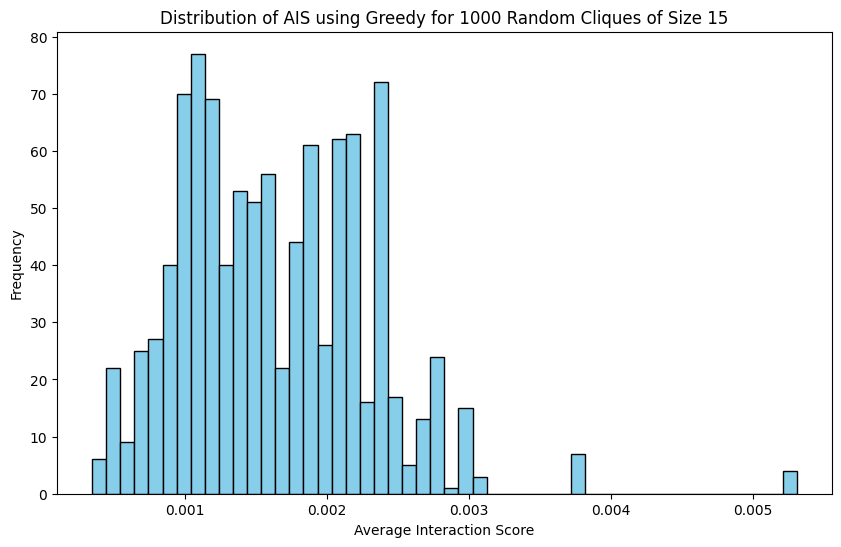

Processing: 100%|██████████| 1000/1000 [33:59<00:00,  2.04s/iteration]


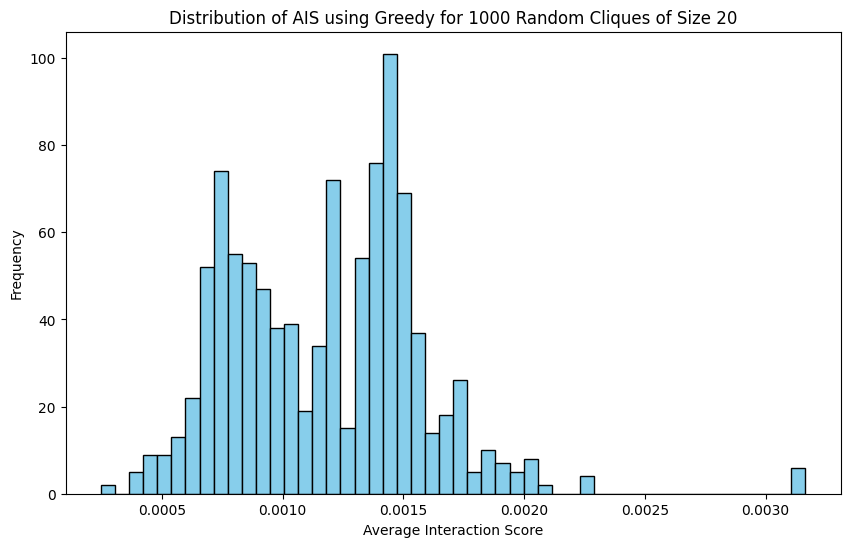

Processing: 100%|██████████| 1000/1000 [3:03:40<00:00, 11.02s/iteration] 


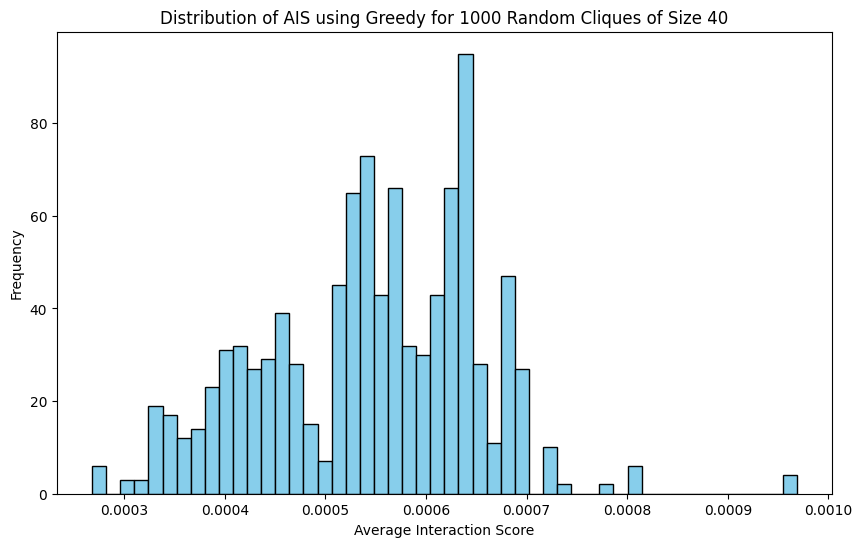

Processing:  26%|██▌       | 256/1000 [2:36:56<7:36:08, 36.79s/iteration] 


KeyboardInterrupt: 

In [51]:
from tqdm import tqdm

clique_sizes = [3, 4, 5, 8, 10, 12, 15, 20, 40, 60]
p_values = []

for i in clique_sizes:
    top_nodes = f.find_clique_greedy(contact_matrix_zero, i, TTN_BIN, bin_map)
    greedy_score = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)
    bg_model_greedy = f.create_background_model_greedy_strong(contact_matrix_zero, i, bin_map, gene_bins=gene_bins, num_iterations=1000)
    
    p_value = mann_whitney_u_test(greedy_score, bg_model_greedy) 
    p_values.append(p_value)

plt.plot(clique_sizes, p_values, marker='o')
plt.xlabel('Clique Size')
plt.ylabel('p-value')
plt.yscale('log')  # Useful if values vary widely
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

## Distribution Plot of Backgrounds

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

clique_sizes = [5, 10, 20, 40]
p_values = []
num_iterations = 1000
ttn_bins = [4275, 4276, 4277, 4278]
colors = ['red', 'blue', 'green', 'orange']  # Define different colors for each bin

for i in clique_sizes:
    ttn_cliques = [f.find_clique_greedy(contact_matrix_zero, i, ttn_bin, bin_map) for ttn_bin in ttn_bins]
    ttn_scores = [f.calculate_avg_interaction_strength(contact_matrix_zero, ttn_clique) for ttn_clique in ttn_cliques]
    
    bg_model_greedy_weak = f.create_background_model_greedy_weak(contact_matrix_zero, i, bin_map, non_gene_bins, num_iterations=num_iterations, display=False)
    bg_model_greedy_strong = f.create_background_model_greedy_strong(contact_matrix_zero, i, bin_map, gene_bins=gene_bins, num_iterations=num_iterations, display=False)

    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot weak model
    axes[0].hist(bg_model_greedy_weak, bins=50, color='skyblue', edgecolor='black')
    for idx, (ttn_score, ttn_bin) in enumerate(zip(ttn_scores, ttn_bins)):
        axes[0].axvline(x=ttn_score, color=colors[idx], linestyle='--', label=f'TTN Score {ttn_bin}: {ttn_score}')
    axes[0].set_xlabel('Average Interaction Score')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Distribution of AIS using Greedy Weak for {num_iterations} Random Cliques of Size {i}')
    axes[0].legend()

    # Plot strong model
    axes[1].hist(bg_model_greedy_strong, bins=50, color='skyblue', edgecolor='black')
    for idx, (ttn_score, ttn_bin) in enumerate(zip(ttn_scores, ttn_bins)):
        axes[1].axvline(x=ttn_score, color=colors[idx], linestyle='--', label=f'TTN Score {ttn_bin}: {ttn_score}')
    axes[1].set_xlabel('Average Interaction Score')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Distribution of AIS using Greedy Strong for {num_iterations} Random Cliques of Size {i}')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

## Stat Testing

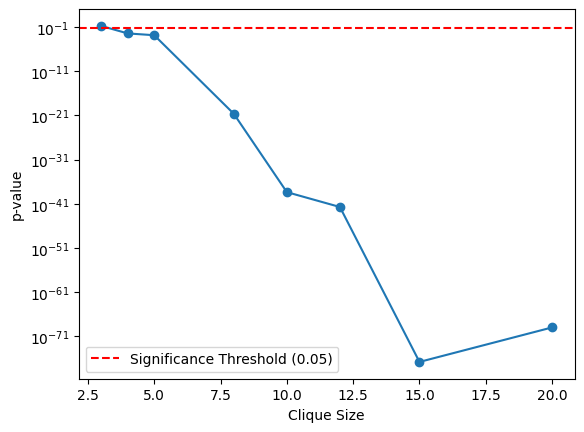

In [88]:
clique_sizes = [3, 4, 5, 8, 10, 12, 15, 20]
p_values = []

for i in clique_sizes:
    with open(f'/Users/ethan/Desktop/chromatin-heart-dev/background_models/greedy_scores_{i}_iterations_1000.txt', 'r') as bg:
        bg_scores = bg.read().splitlines()
        bg_scores = [float(score) for score in bg_scores]

        top_nodes = f.find_clique_greedy(contact_matrix_zero, i, TTN_BIN, bin_map)
        greedy_score = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)

        p_value = t_test(greedy_score, bg_scores)
        p_values.append(p_value)


plt.plot(clique_sizes, p_values, marker='o')
plt.xlabel('Clique Size')
plt.ylabel('p-value')
plt.yscale('log')  # Useful if values vary widely
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

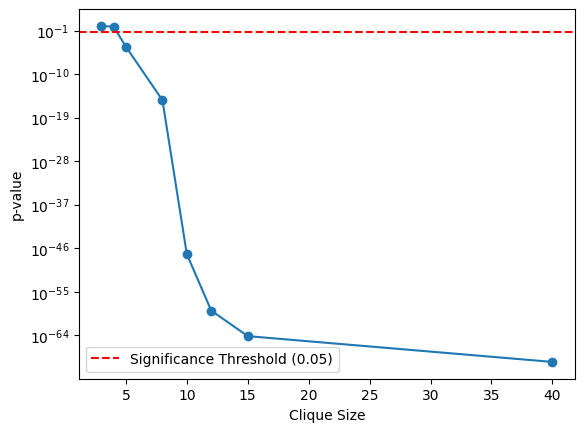

In [89]:
clique_sizes = [5, 10, 20, 40]
p_values = []

for i in clique_sizes:
    with open(f'/Users/ethan/Desktop/chromatin-heart-dev/background_models/greedy_scores_{i}_iterations_1000_strong.txt', 'r') as bg:
        bg_scores = bg.read().splitlines()
        bg_scores = [float(score) for score in bg_scores]

        top_nodes = f.find_clique_greedy(contact_matrix_zero, i, TTN_BIN, bin_map)
        greedy_score = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)

        p_value = t_test(greedy_score, bg_scores)
        p_values.append(p_value)


plt.plot(clique_sizes, p_values, marker='o')
plt.xlabel('Clique Size')
plt.ylabel('p-value')
plt.yscale('log')  # Useful if values vary widely
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

In [573]:
def get_stats_from_bg_model(type, clique_size, iterations):
    file_suffix = 'iterations' if type == 'greedy' else 'molecules'
    file_path = f'/Users/ethan/Desktop/chromatin-heart-dev/background_models/{type}_scores_{clique_size}_{file_suffix}_{iterations}.txt'
    
    with open(file_path, 'r') as bg:
        bg_scores = [float(score) for score in bg.read().splitlines()]
    
    top_nodes = f.find_clique_greedy(contact_matrix_zero, clique_size, TTN_BIN, bin_map)
    greedy_score = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)

    mean_bg = np.mean(bg_scores)
    var_bg = np.var(bg_scores)
    std_bg = np.std(bg_scores)

    p_value = mann_whitney_u_test(greedy_score, bg_scores)
    percent_higher = np.mean(np.array(bg_scores) > greedy_score) * 100

    print(f'TTN Clique Score: {greedy_score:.4f}')
    print(f'Background Scores Mean: {mean_bg:.4f}')
    print(f'Background Scores Variance: {var_bg:.4f}')
    print(f'Background Scores Std Dev: {std_bg:.4f}')
    print(f'Percentage of Background Scores Higher Than TTN: {percent_higher:.2f}%')
    print(f'p-value: {p_value:.3e}')

In [574]:
get_stats_from_bg_model('greedy', 5, 1000)

TTN Clique Score: 0.0102
Background Scores Mean: 0.0045
Background Scores Variance: 0.0000
Background Scores Std Dev: 0.0038
Percentage of Background Scores Higher Than TTN: 9.10%
p-value: 1.229e-251


In [575]:
get_stats_from_bg_model('greedy', 8, 1000)

TTN Clique Score: 0.0051
Background Scores Mean: 0.0030
Background Scores Variance: 0.0000
Background Scores Std Dev: 0.0019
Percentage of Background Scores Higher Than TTN: 15.50%
p-value: 9.693e-180


In [572]:
import numpy as np
from scipy.stats import norm

# Given values
ttn_score = 0.0051
mean_bg = 0.0030
std_bg = 0.0019

# Z-score calculation
z_score = (ttn_score - mean_bg) / std_bg

# P-value calculation from Z-score (one-tailed test)
p_value_from_z = 1 - norm.cdf(z_score)

print(f'Z-score: {z_score:.2f}')
print(f'P-value from Z-score: {p_value_from_z:.3e}')

Z-score: 1.11
P-value from Z-score: 1.345e-01


## Molecules vs Time

100%|██████████| 250000/250000 [14:27<00:00, 288.27it/s] 


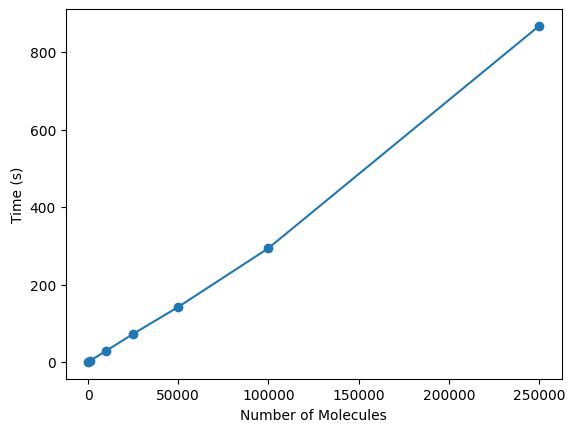

In [10]:
import time
# plot molecules to time
molecules = [100,1000,10000,25000,50000, 100000, 250000]
time_values = []

for m in molecules:
    start = time.time()
    top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=m, alpha=0.05, verbose=True)
    end = time.time()
    time_values.append(end-start)

plt.plot(molecules, time_values, marker='o')
plt.xlabel('Number of Molecules')
plt.ylabel('Time (s)')
plt.show()


## Alpha vs Time

100%|██████████| 1000/1000 [00:00<00:00, 2950.89it/s]


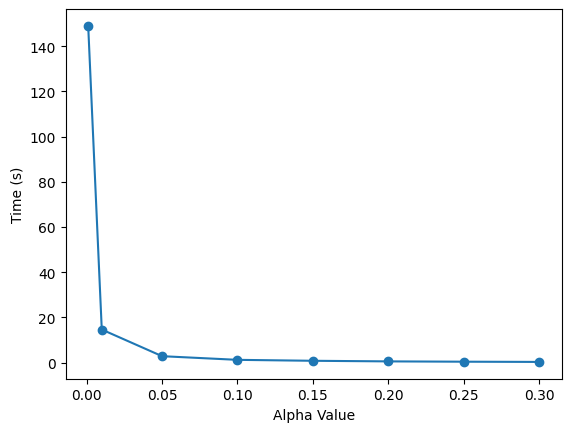

In [12]:
# plot alpha values to time using clique size 5
alphas = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
time_values = []

for a in alphas:
    start = time.time()
    top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=1000, alpha=a, verbose=True)
    end = time.time()
    time_values.append(end-start)

plt.plot(alphas, time_values, marker='o')
plt.xlabel('Alpha Value')
plt.ylabel('Time (s)')
plt.show()



## Alpha vs p value, (for now can use clique size 5)

In [8]:
top_nodes

array([ 4277, 30386, 28366, 30438,  9294])

In [6]:
top_nodes

array([ 4277, 30364,  6840,  5342, 28072])

Processing: 100%|██████████| 1000/1000 [00:02<00:00, 498.74iteration/s]


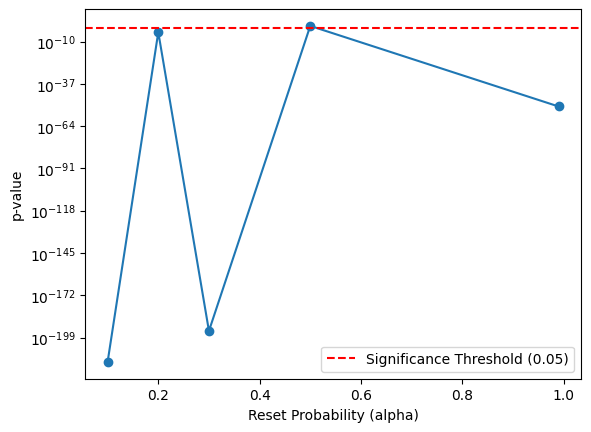

In [50]:
from tqdm import tqdm
import matplotlib.pyplot as plt

alphas = [0.1, 0.2, 0.3, 0.5, 0.99]
p_values = []

for a in alphas:
    top_nodes = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=1000, alpha=a, verbose=True)
    rw_score = f.calculate_avg_interaction_strength(contact_matrix_zero, top_nodes)
    bg_model_rw = f.create_background_model_rw_strong(contact_matrix_zero, 5, gene_bins=gene_bins, num_molecules=1000, num_iterations=1000, alpha=a)

    p_value = mann_whitney_u_test(rw_score, bg_model_rw)
    p_values.append(p_value)

plt.plot(alphas, p_values, marker='o')
plt.xlabel('Reset Probability (alpha)')
plt.ylabel('p-value')
plt.yscale('log')  # Log scale if values vary widely
plt.axhline(0.05, color='r', linestyle='--', label='Significance Threshold (0.05)')
plt.legend()
plt.show()

## Bed Narrow Peak

In [21]:
# LOAD BIN MAP
bin_map_loc = f.load_bin_map_loc('/Users/ethan/Desktop/chromatin-heart-dev/data/bin_map_human_100000.bed')

In [23]:
f.find_bin('chr2', 61443502, bin_map_loc)

3104

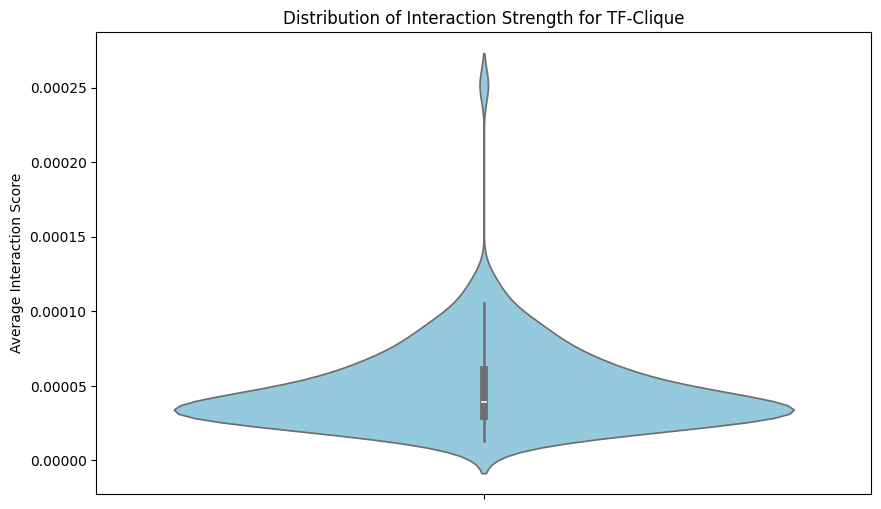

In [91]:
# Open data/transcription_factors, contains a directory of .bed files containing transcription factor binding sites

import os
import pandas as pd
import seaborn as sns

# Load the transcription factor binding sites
data_dir = '../data/transcription_factors'
tf_files = os.listdir(data_dir)

# Return counts of transcription factor binding sites in each 100kb bin
def process_bed_file(file_path):
    bin_counts = {}

    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#') or not line.strip():
                continue
            columns = line.split()
            
            chrom = columns[0]
            start_position = int(columns[1])    
            
            bin_number = f.find_bin(chrom, start_position, bin_map_loc)
            
            if bin_number not in bin_counts:
                bin_counts[bin_number] = 0
            bin_counts[bin_number] += 1

    return bin_counts

interaction_scores = []

# Contains top 1 bin for each TF
max_bins = []
bin_set = set()

for filename in os.listdir(data_dir):
    # open file

    try:    
        bin_counts = process_bed_file(os.path.join(data_dir, filename))
    except:
        print(f'Error processing {filename}')
        continue

    # get top 20 bins
    top_bins = sorted(bin_counts, key=bin_counts.get, reverse=True)[:20]

    max_bins.append(top_bins[0])
    bin_set.update(top_bins)

    interaction_strength = f.calculate_avg_interaction_strength(contact_matrix_zero, top_bins)
    interaction_scores.append(interaction_strength)

    # get span of chromosmes of the top bins
    chrom_span = f.get_chromosome_span(top_bins, bin_map)



# Plot the distribution as a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y=interaction_scores, inner='box', color='skyblue')
plt.ylabel('Average Interaction Score')
plt.title('Distribution of Interaction Strength for TF-Clique')
plt.show()
    


/var/folders/db/z1b_vlyx6z50n353tspswlc80000gn/T/ipykernel_70950/64907716.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Score', data=df, inner='box', palette='pastel')


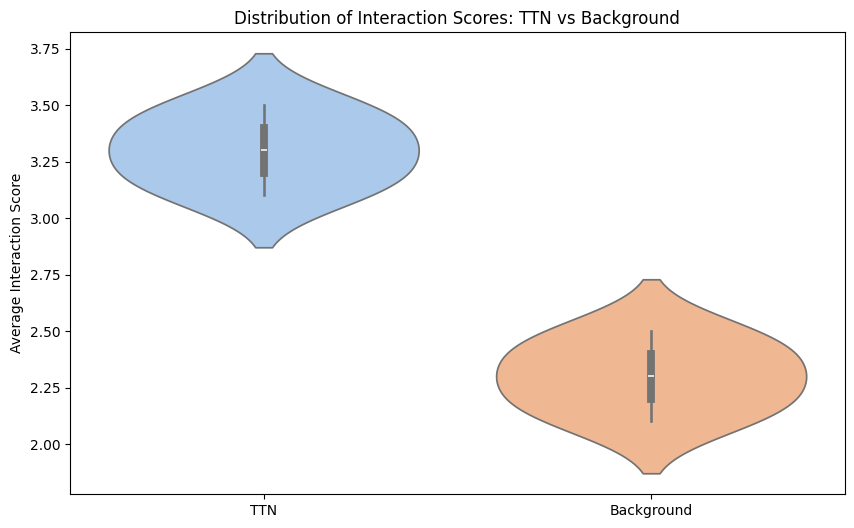

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example: two score arrays
ttn_scores = [3.1, 3.3, 3.5, 3.4, 3.2]
background_scores = [2.1, 2.4, 2.3, 2.2, 2.5]

# Combine into a DataFrame for seaborn
df = pd.DataFrame({
    'Score': ttn_scores + background_scores,
    'Group': ['TTN'] * len(ttn_scores) + ['Background'] * len(background_scores)
})

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Group', y='Score', data=df, inner='box', palette='pastel')
plt.title('Distribution of Interaction Scores: TTN vs Background')
plt.ylabel('Average Interaction Score')
plt.xlabel('')
plt.show()

In [61]:
max(interaction_scores)

np.float64(0.00025158912799886306)

In [80]:
max_bins

[10572,
 4799,
 19237,
 28038,
 28038,
 1552,
 10879,
 18745,
 1925,
 27040,
 10874,
 19237,
 1610,
 10876,
 22144,
 4682,
 26682,
 27675,
 12378,
 18745,
 26616,
 25319,
 22160,
 24995,
 30077,
 10616,
 22144,
 21768,
 5897,
 25196,
 27862,
 10876,
 10875,
 19559,
 25319,
 25319,
 25695,
 24995,
 1606,
 19237,
 10879,
 30077,
 26973,
 22144,
 18745,
 30077,
 27625,
 1606,
 18745,
 25688,
 282,
 26378,
 1925,
 26378,
 18745,
 10892,
 10892,
 22415,
 26678,
 10617,
 10892,
 1606,
 26571,
 18745,
 1165,
 18745,
 25695,
 18745,
 14921,
 18745,
 9991,
 22125,
 24934,
 26332,
 22144,
 10875,
 27136,
 28038,
 22144,
 24995,
 12378,
 19237,
 10610,
 18745,
 10874,
 18749,
 30077,
 1606,
 27598,
 10876,
 9991,
 19237,
 10892,
 22144,
 18745,
 20366,
 1925,
 25319,
 1606,
 1925,
 2487,
 2217,
 10892,
 25319,
 10876,
 1606,
 10892,
 27674,
 18765,
 9358,
 24995,
 16114,
 26563,
 25688,
 26378,
 26563,
 10617,
 18745,
 26616,
 25512,
 18745,
 10892,
 26571,
 19237,
 10940,
 26563,
 24995,
 22144,

100%|██████████| 138/138 [00:53<00:00,  2.56it/s]


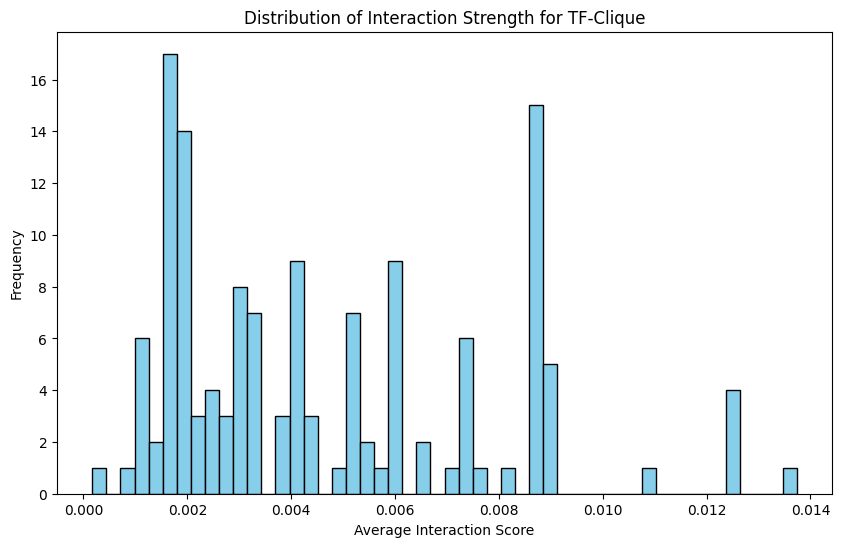

In [81]:
interaction_scores = []

for i in tqdm(range(len(max_bins))):
    clique = f.find_clique_greedy(contact_matrix_zero, 5, max_bins[i], bin_map)
    score = f.calculate_avg_interaction_strength(contact_matrix_zero, clique)
    interaction_scores.append(score)

# Plot the distribution of interaction scores
plt.figure(figsize=(10, 6))
plt.hist(interaction_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Average Interaction Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Interaction Strength for TF-Clique')
plt.show()



    

100%|██████████| 138/138 [07:32<00:00,  3.28s/it]


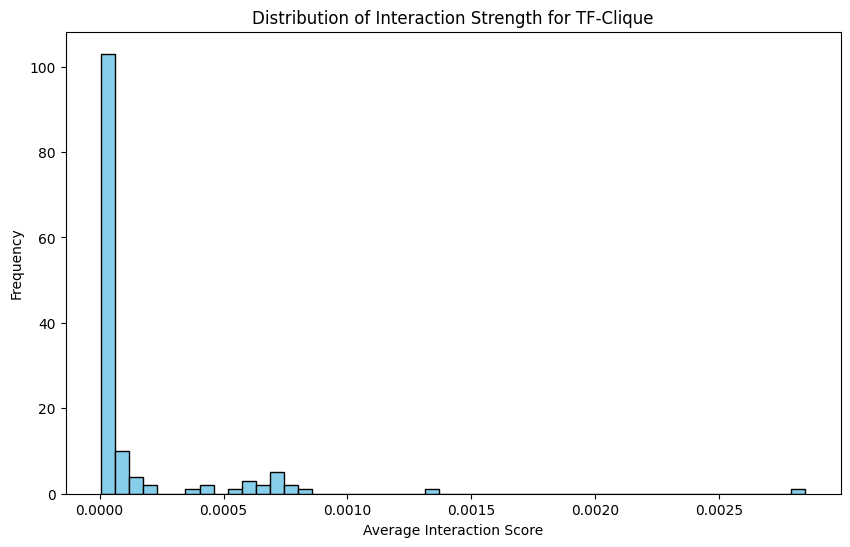

In [83]:
interaction_scores = []

for i in tqdm(range(len(max_bins))):
    clique = f.random_walk(contact_matrix_zero, max_bins[i], 5, num_molecules=1000, alpha=0.05, verbose=False)
    score = f.calculate_avg_interaction_strength(contact_matrix_zero, clique)
    interaction_scores.append(score)

# Plot the distribution of interaction scores
plt.figure(figsize=(10, 6))
plt.hist(interaction_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Average Interaction Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Interaction Strength for TF-Clique')
plt.show()



    

In [86]:
ttn_clique = f.random_walk(contact_matrix_zero, TTN_BIN, 5, num_molecules=1000, alpha=0.05, verbose=False)
score_rw = f.calculate_avg_interaction_strength(contact_matrix_zero, ttn_clique)

t_test(score_rw, interaction_scores)

np.float64(7.71623512307287e-05)